Author : Debarshi Roy

Batch: DS21AUG01

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Tasks

1. Data clean up – Missing value treatment

     a. Drop records where rating is missing since rating is our target/study variable

In [2]:
df = pd.read_csv(r'C:\Users\91726\Downloads\Python Assignment 2_BI\playstore-analysis.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
rating = pd.isnull(df['Rating'])

In [6]:
df[rating]                          #this will display the null value in Content rating 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7000.0,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5700.0,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3700.0,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7400.0,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2900.0,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82000.0,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7700.0,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9800.0,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9600.0,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [7]:
df.dropna(how='any', subset=['Rating'], axis=0, inplace = True)

#df.dropna(subset=['Rating'])

b. Check the null values for the Android Ver column. 

i. Are all 3 records having the same problem?

ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

iii. Replace remaining missing values with the mode

In [8]:
#b1

na = pd.isnull(df['Android Ver'])
df[na]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


ANS : Yes all three records have same problem

In [9]:
#b2
df.drop([10472], inplace = True)

In [10]:
## Replace NaN value with Mode of Android Ver with its mode
df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace=True)        

c. Current ver – replace with most common value

In [11]:
## Replacing all values of Current Ver with Mode

df['Current Ver'].fillna(df['Current Ver'].mode()[0], inplace=True)

In [12]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


2. Data clean up – correcting the data types

        a. Which all variables need to be brought to numeric types?

ANS. The following variables are in object type and need to be brought to numeric type:-                    Reviews,Installs,Price,Content Rating

       b. Price variable – remove $ sign and convert to float

In [13]:
df['Price'] = df['Price'].str.replace('$','')
df['Price'] = pd.to_numeric(df['Price'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1.0+ MB


ANS.  As you can see the Price coloumn has been changed to Float.

       c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [14]:
## To remove ','
df['Installs'] = df['Installs'].str.replace(',','')

## To remove '+'
df['Installs'] = df['Installs'].str.replace('+','')

## To convert "Installs" from object to Int
df['Installs'] = df['Installs'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int32(1), object(9)
memory usage: 987.8+ KB


ANS. As you can see the 'Installs' coloumns has been converted to Integer type

       d. Convert all other identified columns to numeric

In [15]:
## Converting Reviews Coloumn to numeric type
df['Reviews'] = pd.to_numeric(df['Reviews'])




3. Sanity checks – check for the following and handle accordingly

        a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

        i. Are there any such records? Drop if so

In [16]:
test1 = df[(df['Rating'] < 1)]
print(test1)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [17]:
test2 = df[(df['Rating'] > 5)]
print(test2)
    

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


ANS. As you can see the above return empty lists, so we can say there is no value greater than 5 and less than 1 in Ratings coloumn.

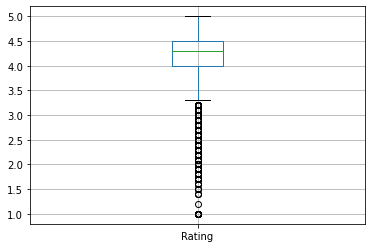

In [18]:
boxplot = df.boxplot(column=['Rating'])

b. Reviews should not be more than installs as only those who installed can review the 
app.
i. Are there any such records? Drop if so.

In [19]:
fake = df[df['Reviews']>df['Installs']].index
df.drop(labels=fake, inplace=True)               

In [20]:
df.loc[df['Reviews']>df['Installs']]
        

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### 4. Identify and handle outliers – 

a. Price column

            i. Make suitable plot to identify outliers in price

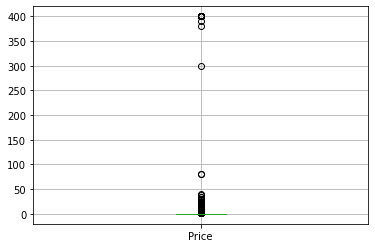

In [21]:
boxplot = df.boxplot(column=['Price'])

ii.Do you expect apps on the play store to cost $200? Check out these cases

In [22]:
df.loc[df['Price'] > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [23]:
##  Limit data to records with price < $30
df2 = df[df.Price > 30].index
df.drop(labels=df2, inplace=True)

In [24]:
df.describe() ## this will be our limited dataset for now

,Rating,Reviews,Size,Installs,Price
count,9338.000000,9.338000e+03,9338.000000,9.338000e+03,9338.000000
mean,4.191776,5.155891e+05,22725.789334,1.795108e+07,0.301915
std,0.515031,3.148627e+06,21310.340299,9.136965e+07,1.669887
min,1.000000,1.000000e+00,8.500000,5.000000e+00,0.000000
25%,4.000000,1.890000e+02,6600.000000,1.000000e+04,0.000000
50%,4.300000,6.011500e+03,21000.000000,5.000000e+05,0.000000
75%,4.500000,8.247100e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,29.990000


iii. After dropping the useless records, make the suitable plot again to identify outliers

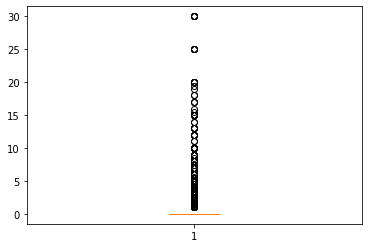

In [28]:
plt.boxplot(df['Price'])
plt.show()

b. Reviews column
   i. Make suitable plot
   ii. Limit data to apps with < 1 Million review

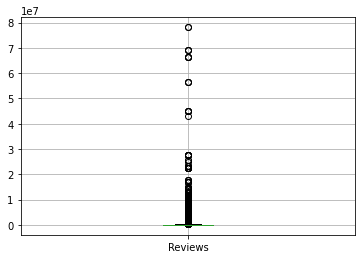

In [29]:
# 1 plot
rboxplot = df.boxplot(column=['Reviews'])

In [30]:
mil = df[df['Reviews'] > 1000000 ].index
df.drop(labels = mil, inplace=True)
print(mil.value_counts().sum(),'cols dropped')

704 cols dropped


In [31]:
df.describe() ## new limited data

,Rating,Reviews,Size,Installs,Price
count,8634.000000,8634.000000,8634.000000,8.634000e+03,8634.000000
mean,4.172492,68383.348853,21636.459060,4.288536e+06,0.324913
std,0.528913,156335.806417,20663.668474,2.864650e+07,1.731362
min,1.000000,1.000000,8.500000,5.000000e+00,0.000000
25%,4.000000,143.250000,6000.000000,1.000000e+04,0.000000
50%,4.300000,3641.000000,18000.000000,1.000000e+05,0.000000
75%,4.500000,46070.500000,26000.000000,1.000000e+06,0.000000
max,5.000000,995002.000000,100000.000000,1.000000e+09,29.990000


In [32]:
max_threshold = df.Installs.quantile(0.95)
print(max_threshold)

10000000.0


In [33]:
## drop the records with Installs greater than 95th percentile
dr = df[df['Installs'] >= max_threshold].index
df.drop(dr , inplace=True) 

In [34]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,7258.000000,7258.000000,7258.000000,7.258000e+03,7258.000000
mean,4.149959,19233.187655,20392.492106,7.932245e+05,0.386375
std,0.561834,47763.102974,20309.608936,1.482872e+06,1.882061
min,1.000000,1.000000,8.500000,5.000000e+00,0.000000
25%,3.900000,85.000000,5300.000000,1.000000e+04,0.000000
50%,4.300000,1383.000000,15000.000000,1.000000e+05,0.000000
75%,4.500000,16394.000000,26000.000000,1.000000e+06,0.000000
max,5.000000,896118.000000,100000.000000,5.000000e+06,29.990000


### Data analysis to answer business questions

What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower 
values?

a. How do you explain this?
b. What is the implication of this on your analysis

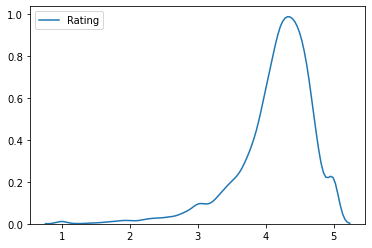

In [35]:
sns.kdeplot(data=df['Rating'])

ANS. As we can see in the above density plot, the Rating data is negatively(left) skewed or more skewed towards Lower values

ANS. This means there are more apps that are highly rated or the overall rating of apps is high. This 
      means we cannot define or rank apps based solely on their ratings.

6. What are the top Content Rating values?

  a. Are there any values with very few records?

In [36]:
## to get the top content rating values

df['Content Rating'].value_counts()

Everyone           5913
Teen                746
Mature 17+          346
Everyone 10+        249
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

As we can see the "Adult only 18+" and "Unrated" Rated apps are very few in number.

b. if yes, drop those as they won’t help in the analysis

In [37]:
## To drop 'Adults only 18+' and 'Unrated' Rated apps

u = df[ df['Content Rating'] == 'Adults only 18+'].index
df.drop(u , inplace=True)

## and 'Unrated' Rated apps

r = df[ df['Content Rating'] == 'Unrated'].index
df.drop(r , inplace=True)

In [38]:
df['Content Rating'].value_counts()

Everyone        5913
Teen             746
Mature 17+       346
Everyone 10+     249
Name: Content Rating, dtype: int64

#### 7. Effect of size on rating

      a. Make a joinplot to understand the effect of size on rating

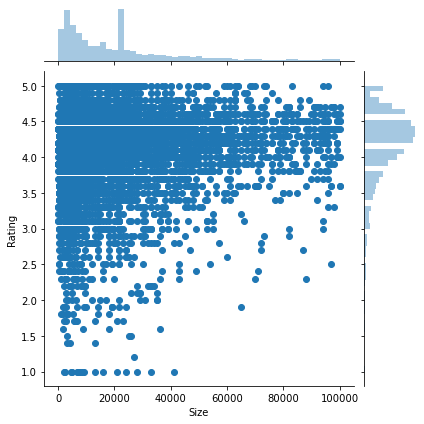

In [39]:
sns.jointplot(x=df['Size'], y=df['Rating'])

b. Do you see any patterns?

Observation- There is a negative correlation between size and rating.

c. How do you explain the pattern?

Explaination- Users tend to prefer small app size over rating. But most of the apps fall under 80mb, hence we cannot draw a safe conclusion.

##### 8. Effect of price on rating

a. Make a jointplot (with regression line)

C:\Users\91726\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


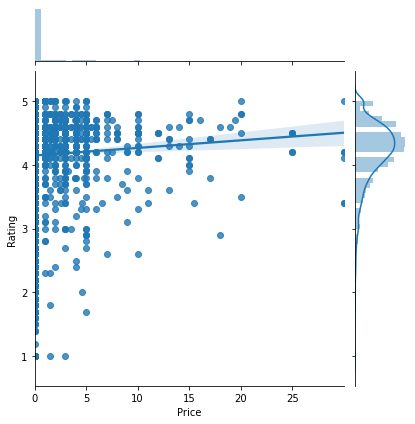

In [40]:
sns.jointplot(x=df['Price'], y=df['Rating'], kind="reg")

b. What pattern do you see?

Observation- We can see there is a positive correlation between Rating and Price.

c. How do you explain the pattern?

80% of the apps fall under the price of 20$. So we cannot take the positive correlation conclusion .

d.Replot the data, this time with only records with price > 0

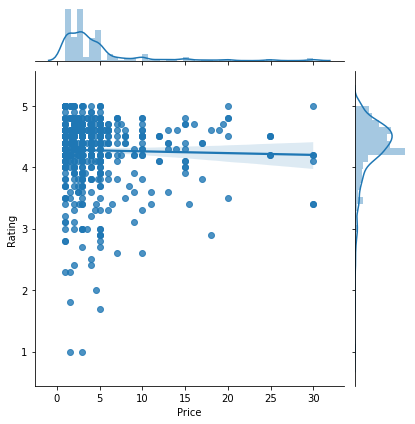

In [41]:
df1=df.loc[df.Price>0]
sns.jointplot(x='Price', y='Rating', data=df1, kind='reg')
plt.show()

e.Does the pattern change?

Observation- Yes there is a slight negative correlation between Rating and app size

f. What is your overall inference on the effect of price on the rating

Observation- Price slightly affects its correlation with Rating, Plus most of the apps falls under 30$. So it is not the conclusion we can take.

9. Look at all the numeric interactions together – 
a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

C:\Users\91726\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


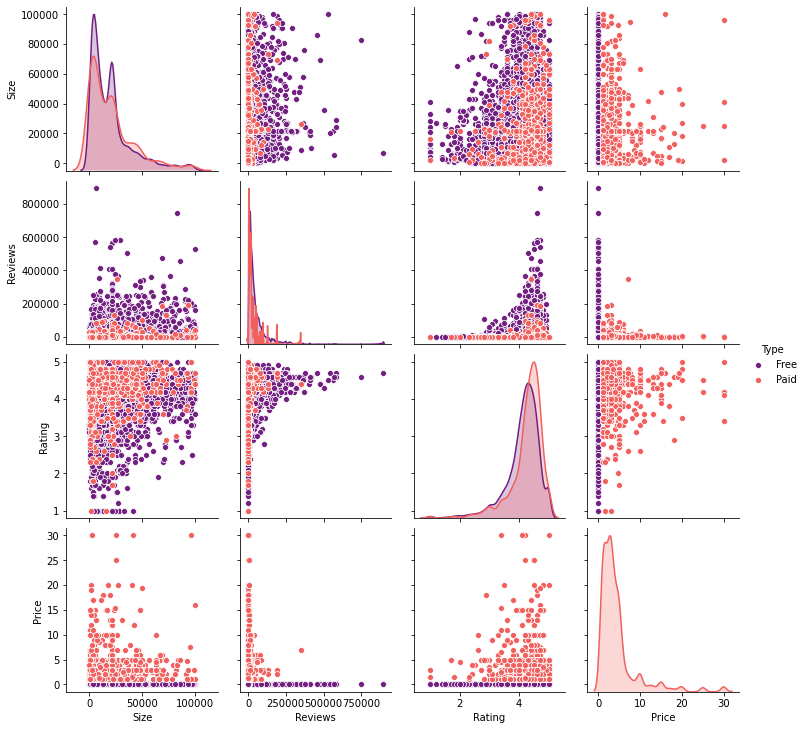

In [43]:
sns.pairplot(df[["Size", "Reviews", "Rating", "Price", "Type"]], hue="Type", palette="magma")
plt.show()

#### 10. Rating vs. content rating

a. Make a bar plot displaying the rating for each content rating

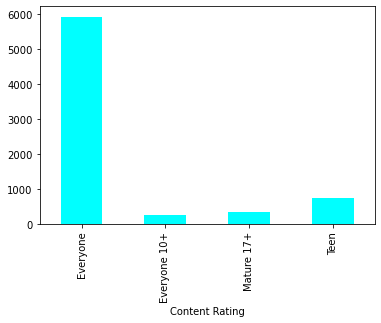

In [44]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar(color="cyan")

b. Which metric would you use? Mean? Median? Some other quantile?

ANS. Will Take Median for the plot. As their are outliers.

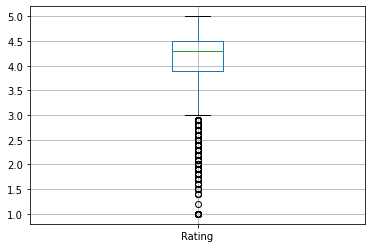

In [45]:
df.boxplot(['Rating'])

c. Choose the right metric and plot

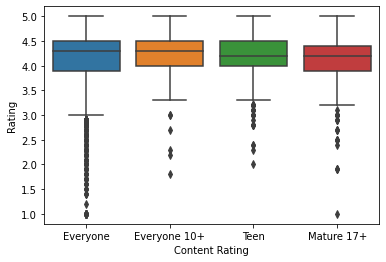

In [46]:
sns.boxplot(x=df['Content Rating'],y=df['Rating'])

#### 11. Content rating vs. size vs. rating – 3 variables at a time

a. Create 5 buckets (20% records in each) based on Size.

In [47]:
bucket=[0, 20000, 40000, 60000, 80000, 100000]
df['Bucket Size'] = pd.cut(df['Size'], bucket, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.136404,4.214865,3.990058,4.175758
20k-40k,4.163083,4.140952,4.144348,4.159292
40k-60k,4.144717,4.232432,4.177143,4.232184
60k-80k,4.206081,4.289474,4.228571,4.244231
80k-100k,4.213821,4.221429,4.290909,4.243137


b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each 
combination

In [48]:
combo=pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
combo

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.8,4.00,3.50,3.8
20k-40k,3.8,3.90,3.90,3.9
40k-60k,3.8,4.00,4.10,4.0
60k-80k,3.9,4.16,3.96,3.9
80k-100k,3.9,3.92,4.00,4.0


c. Make a heatmap of this
i. Annotated
ii. Greens color map

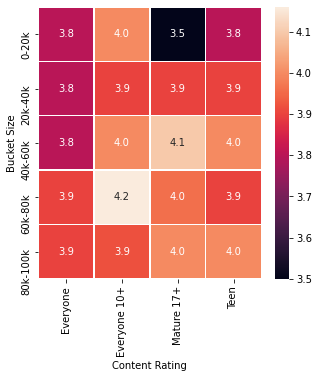

In [49]:
# annoted
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(combo, annot=True, linewidths=.5, fmt='.1f',ax=ax)
plt.show()

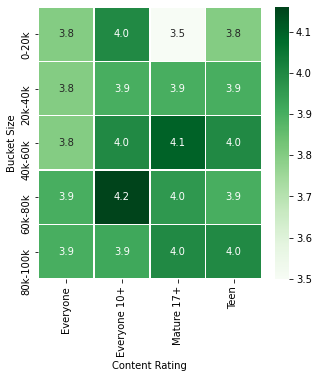

In [50]:
# green color
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(combo, annot=True, linewidths=.5, cmap='Greens', fmt='.1f',ax=ax)
plt.show()

d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

ANS. We cannot say in particular that ligther apps are preferred because apps of size 60-80k and 80-100k have recieved more ratings. Heavier apps are surely preferred over lighter apps.